In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

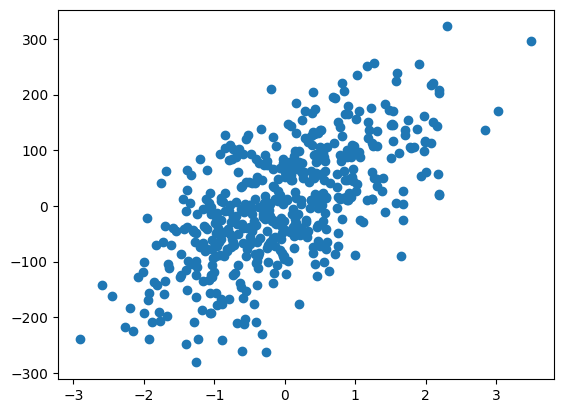

In [134]:
X, y = make_regression(n_samples=500,n_features=1,n_informative=1, n_targets=1,noise=80, random_state =30)
plt.scatter(X,y)

# Now lets start the linear regression 

In [147]:
class Li_Reg():       # Linear Regression
    def __init__(self,learning_rate,epochs,m,b):
        self.m = m
        self.b = b
        self.learning_rate = learning_rate
        self.epochs = epochs
        
    def fit(self,X,y):
        for i in range(self.epochs):
            #Applying Gradient Descent on loss function to calculate "m" and "b"
            loss_slope_b = -2*np.sum(y-self.m*X.ravel()-self.b)    #Calculating slope wrt "b"
            self.b = self.b - (self.learning_rate*loss_slope_b)                      #(b new = b old - lr*slope_b)  Calculating b
            loss_slope_m = -2*np.sum((y-self.m*X.ravel()-self.b)*(X.ravel()))    #Calculating slope wrt "m"
            self.m = self.m - (self.learning_rate*loss_slope_m)                      #(b new = b old - lr*slope_b)  Calculating m
        return (self.m,self.b)

# Splitting data into Train Test Split

In [148]:
# Shuffle the data
indices = np.arange(len(X))
np.random.shuffle(indices)

# Determine the split index
split_index = int(0.3 * len(X))

# Split the data
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Using the LI_Reg class

In [149]:
LR = Li_Reg(0.001,50,200,-100)

In [150]:
m ,b = LR.fit(X_train,y_train)

In [151]:
# Now prediction
y_pred = m*X_test.ravel()+b    # y = mx+b

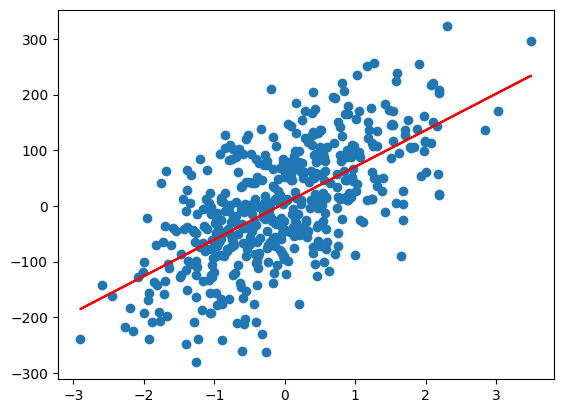

In [152]:
plt.scatter(X,y)
plt.plot(X_test,y_pred,color = 'red')

# Using Sklearn LinearRegression model

In [153]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [154]:
reg.fit(X_train,y_train)

LinearRegression()

In [155]:
y_pred_reg = reg.predict(X_test)

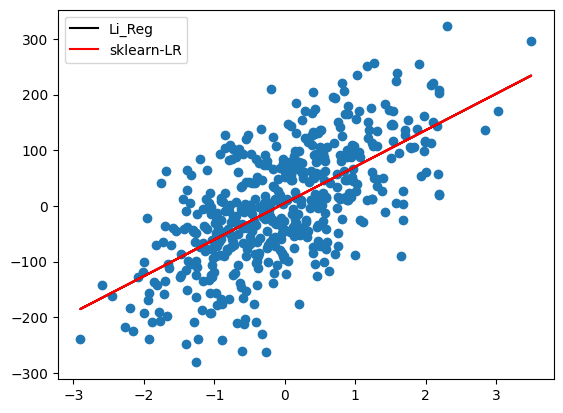

In [156]:
plt.scatter(X,y)
plt.plot(X_test,y_pred_reg,color = 'black',label = "Li_Reg")
plt.plot(X_test,y_pred,color='red',label = "sklearn-LR")
plt.legend()
plt.show()

# Comparison Between Li_Reg and Sklearn LR Model 

## Accuracy

In [157]:
from sklearn.metrics import r2_score
print("Li_Reg Accuracy:",r2_score(y_test,y_pred))
print("Sklearn Linear regression model Accuracy:",r2_score(y_test,y_pred_reg))

Li_Reg Accuracy: 0.4081005783560995
Sklearn Linear regression model Accuracy: 0.40810057534648625


## Compairing the Intercept(b) and slope(m) of Li_Reg and Sklearn LinearRegression model

### *Intercept*

In [167]:
print("LinearRegression ",reg.intercept_)
print("Li_Reg ",LR.b)

LinearRegression  5.029939560364619
Li_Reg  5.029925703847333


### *Slope*

In [169]:
print("LinearRegression ",reg.coefficient_)
print("Li_Reg ",LR.m)

AttributeError: 'LinearRegression' object has no attribute 'coefficient_'